# Finding optimal hyperparameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from itertools import product

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_28908\3649081410.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read data and define input and output
data = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/Data formatting/Dataset_scaled_denoised.xlsx')
data = data[data['I'] == 1.6]
X = data.iloc[:,:9]
X = X.drop('S4_cur', axis = 1)
X = X.drop('S1_cur', axis = 1)
X = X.drop('I', axis = 1)
X = X.drop('Sp_cur', axis = 1)

y = X.iloc[2:,:]
X = X.iloc[1:-1,:]

In [4]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set deterministic GPU usage
tf.config.experimental.set_visible_devices([], 'GPU')

In [5]:
# Define test and train datasets
X_numpy = X.values
y_numpy = y.values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)

In [23]:
# Function to iterate through different criterias
def create_model(hidden_layers=1, activation='relu', batch_size=32):
    model = Sequential()
    model.add(Dense(10, activation=activation, input_dim=X_train.shape[1]))
    for _ in range(hidden_layers):
        model.add(Dense(20, activation=activation))
    model.add(Dense(5, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define the hyperparameters to search over
epochs_range = [50,100]
hidden_layers_range = [2, 4, 6]
activation_functions = ['relu']
batch_sizes = [32,64]


# Initialize lists to store results
results = []
best_mse = float('inf')
best_params = {}

In [24]:
# Perform grid search over hyperparameters
for epochs, hidden_layers, activation, batch_size in product(epochs_range, hidden_layers_range, activation_functions, batch_sizes):
    # Create and train the model
    model = create_model(hidden_layers=hidden_layers, activation=activation, batch_size = batch_size)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store results
    results.append((epochs, hidden_layers, activation, batch_size, mse))

    print(epochs, hidden_layers, activation, batch_size, mse)
    
    # Update best parameters if MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_params = {'epochs': epochs, 'hidden_layers': hidden_layers, 'activation': activation, 'batch_size': batch_size}

901/901 [==============================] - 1s 627us/step
50 2 relu 32 8.471650607191519e-07
901/901 [==============================] - 1s 598us/step
50 2 relu 64 1.1619272228228587e-06
901/901 [==============================] - 1s 740us/step
50 4 relu 32 2.9318865227393563e-06
901/901 [==============================] - 1s 738us/step
50 4 relu 64 4.220863067156668e-06
901/901 [==============================] - 1s 639us/step
50 6 relu 32 1.1409081201612761e-05
901/901 [==============================] - 1s 797us/step
50 6 relu 64 1.6994243928597072e-05
901/901 [==============================] - 1s 634us/step
100 2 relu 32 5.442713673569552e-07
901/901 [==============================] - 1s 588us/step
100 2 relu 64 4.394965796794899e-07
901/901 [==============================] - 1s 653us/step
100 4 relu 32 3.294953136187941e-06
901/901 [==============================] - 1s 883us/step
100 4 relu 64 7.668126114380132e-07
901/901 [==============================] - 1s 902us/step
100 6 relu 32 1

In [25]:
# Print the most optimal solution
print("Most optimal solution:")
print("Hyperparameters:", best_params)
print("Mean Squared Error:", best_mse)

Most optimal solution:
Hyperparameters: {'epochs': 100, 'hidden_layers': 2, 'activation': 'relu', 'batch_size': 64}
Mean Squared Error: 4.394965796794899e-07


In [26]:
print(results)

[(50, 2, 'relu', 32, 8.471650607191519e-07), (50, 2, 'relu', 64, 1.1619272228228587e-06), (50, 4, 'relu', 32, 2.9318865227393563e-06), (50, 4, 'relu', 64, 4.220863067156668e-06), (50, 6, 'relu', 32, 1.1409081201612761e-05), (50, 6, 'relu', 64, 1.6994243928597072e-05), (100, 2, 'relu', 32, 5.442713673569552e-07), (100, 2, 'relu', 64, 4.394965796794899e-07), (100, 4, 'relu', 32, 3.294953136187941e-06), (100, 4, 'relu', 64, 7.668126114380132e-07), (100, 6, 'relu', 32, 1.1836228399142354e-06), (100, 6, 'relu', 64, 3.4591173157995033e-06)]


{2: [0.0009204156999525551, 0.0010779272808602901, 0.0007377474956629505, 0.0006629453821239649], 4: [0.0017122752473651415, 0.0020544739149370253, 0.0018152005773985256, 0.0008756783721424284], 6: [0.0033777331454116918, 0.004122407540333327, 0.001087944318388692, 0.0018598702416565257]}
{32: [0.0009204156999525551, 0.0017122752473651415, 0.0033777331454116918, 0.0007377474956629505, 0.0018152005773985256, 0.001087944318388692], 64: [0.0010779272808602901, 0.0020544739149370253, 0.004122407540333327, 0.0006629453821239649, 0.0008756783721424284, 0.0018598702416565257]}


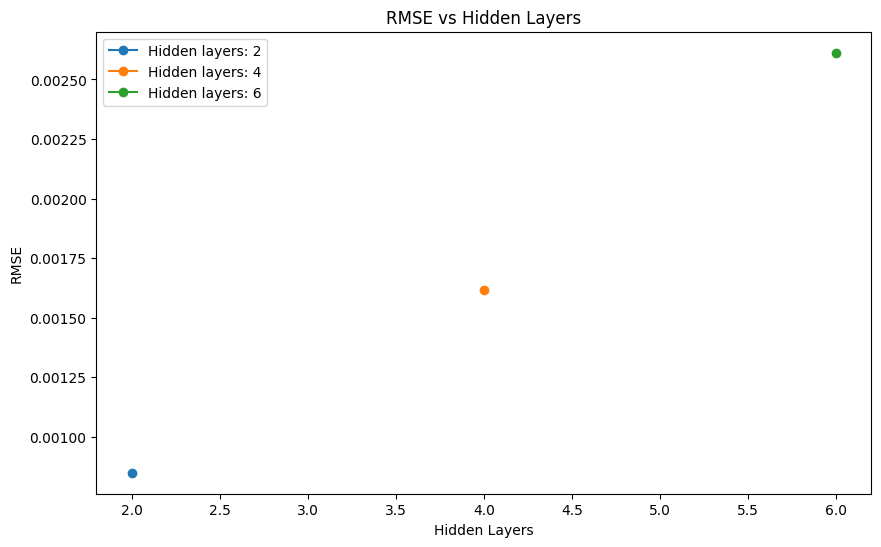

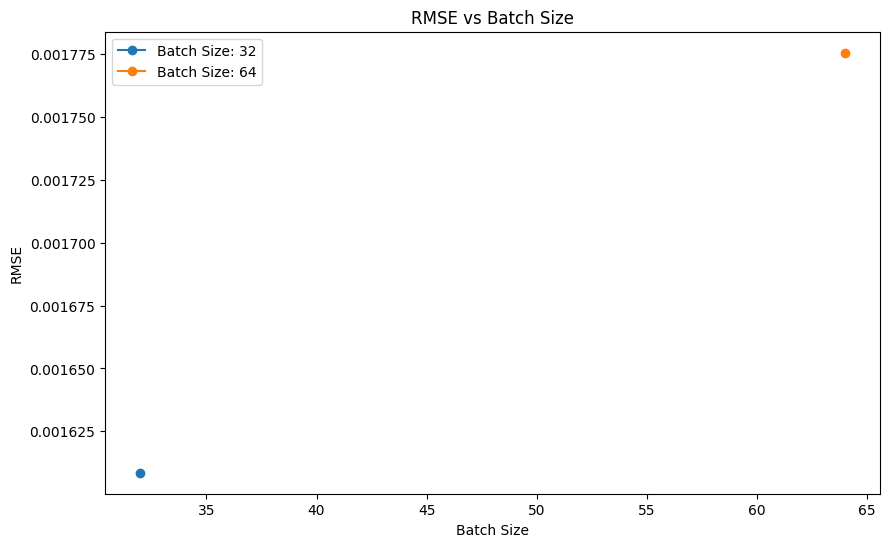

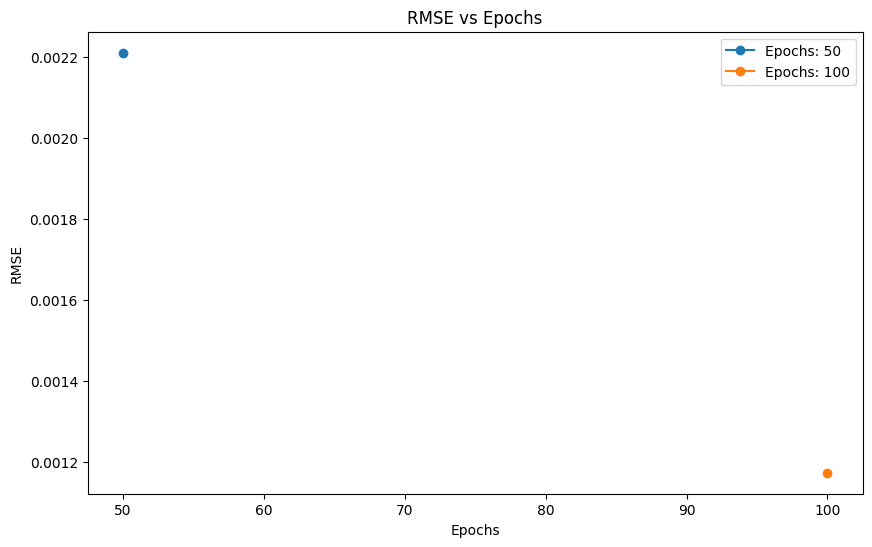

In [27]:
# Extract RMSE values for each combination of hyperparameters
rmse_values_hidden_layers = {}
rmse_values_batch_size = {}
rmse_values_epochs = {}

for epochs, hidden_layers, activation, batch_size, mse in results:
    rmse = np.sqrt(mse)
    if hidden_layers not in rmse_values_hidden_layers:
        rmse_values_hidden_layers[hidden_layers] = []
    rmse_values_hidden_layers[hidden_layers].append(rmse)
    
    if batch_size not in rmse_values_batch_size:
        rmse_values_batch_size[batch_size] = []
    rmse_values_batch_size[batch_size].append(rmse)
    
    if epochs not in rmse_values_epochs:
        rmse_values_epochs[epochs] = []
    rmse_values_epochs[epochs].append(rmse)


print(rmse_values_hidden_layers)
print(rmse_values_batch_size)

#Plot RMSE vs Hidden Layers (mean for each batch size, activation and epochs)
plt.figure(figsize=(10, 6))
for hidden_layers, rmse_list in rmse_values_hidden_layers.items():
    plt.plot(hidden_layers, np.mean(rmse_list), marker='o', label=f'Hidden layers: {hidden_layers}')
plt.xlabel('Hidden Layers')
plt.ylabel('RMSE')
plt.title('RMSE vs Hidden Layers')
plt.legend()
plt.show()

# Plot RMSE vs Batch Size (mean for each hidden layers, activation and epochs)
plt.figure(figsize=(10, 6))
for batch_size, rmse_list in rmse_values_batch_size.items():
    plt.plot(batch_size, np.mean(rmse_list), marker='o', label=f'Batch Size: {batch_size}')
plt.xlabel('Batch Size')
plt.ylabel('RMSE')
plt.title('RMSE vs Batch Size')
plt.legend()
plt.show()

# Plot RMSE vs Epochs (mean for each hidden layers, activation and batch size)
plt.figure(figsize=(10, 6))
for epochs, rmse_list in rmse_values_epochs.items():
    plt.plot(epochs, np.mean(rmse_list), marker='o', label=f'Epochs: {epochs}')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE vs Epochs')
plt.legend()
plt.show()